## Предобработка данных

In [106]:
import pandas as pd
import os
import re
pd.set_option('display.max_rows', 500)
import scipy
from scipy.stats import skew
from scipy.stats import kurtosis
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing

In [107]:
df = pd.read_csv('../../data/final_data.csv')

In [108]:
df['salary_from'] = df['salary_from'].fillna(0)
df['salary_to'] = df['salary_to'].fillna(0)
df['salary'] = df.loc[:,'salary_from'] + df.loc[:,'salary_to']
df.loc[(df.salary_from != 0) & (df.salary_to != 0), 'salary'] = df.salary / 2

In [109]:
df.loc[df.gross == False, 'salary'] = df.salary * 0.87

In [110]:
df.dropna(axis = 0, subset = ['currency', 'gross'], inplace = True)

In [111]:
df.drop(['salary_from', 'salary_to', 'gross'], axis = 1, inplace = True)

In [112]:
df.drop('employment', axis = 1, inplace = True) 

In [113]:
df.shape

(30639, 14)

In [114]:
df.isna().sum()

premium                         0
name                            0
response_letter_required        0
city                        10502
latitude                    10367
longtitude                  10367
raw                          9886
experience                      0
schedule                        0
skills                       5989
has_test                        0
employer                        0
currency                        0
salary                          0
dtype: int64

In [115]:
df = df.loc[~(df.salary == 0)]
df = df.loc[~(df.latitude == 0)]
df = df.loc[~(df.longtitude == 0)]
df.loc[(df.salary < 1000) & (df.currency == 'RUR'), 'salary'] = df.loc[(df.salary < 1000) & (df.currency == 'RUR'), 'salary'] * 1000

In [116]:
df.salary.value_counts()

43500.0     1575
52200.0     1408
34800.0     1226
60900.0     1152
87000.0     1103
            ... 
31224.3        1
176000.0       1
20900.0        1
45600.0        1
184875.0       1
Name: salary, Length: 1337, dtype: int64

In [117]:
df.dropna(axis = 0, subset = ['city', 'latitude', 'longtitude'], inplace = True)

In [118]:
df.shape

(20133, 14)

In [119]:
df.to_csv('../../data/final_data_salary.csv', index = False)

## Гипотезы

In [120]:
skills = [i.split('_') for i in df.skills.astype(str)]

In [121]:
skills = pd.Series([item for sublist in skills for item in sublist]).value_counts()

In [122]:
names = df.name.value_counts()

In [123]:
names[names.index.str.contains('тока', flags=re.IGNORECASE)].sum()

1445

In [124]:
names[names.index.str.contains('фрезе', flags=re.IGNORECASE)].sum()

719

In [125]:
df.skills = df.skills.astype(str)
df.name = df.name.astype(str)

In [126]:
js_skills = df[df.skills.str.contains('Javascri', flags=re.IGNORECASE)]

In [127]:
js_skills.shape

(501, 14)

In [128]:
import numpy as np

In [129]:
js_skills['salary_from'] = js_skills['salary_from'].fillna(0)
js_skills['salary_to'] = js_skills['salary_to'].fillna(0)
js_skills['salary'] = js_skills.loc[:,'salary_from'] + js_skills.loc[:,'salary_to']
js_skills.loc[(js_skills.salary_from != 0) & (js_skills.salary_to != 0), 'salary'] = js_skills.salary / 2

js_skills.groupby("experience").agg({"salary": [np.mean, 'count']}).round(0)

KeyError: 'salary_from'

In [130]:
js_skills.shape

(501, 14)

In [131]:
ones_skills = df[df.skills.str.contains('1с', flags=re.IGNORECASE)]

In [132]:
ones_skills.shape

(2058, 14)

In [133]:
ones_skills['salary_from'] = ones_skills['salary_from'].fillna(0)
ones_skills['salary_to'] = ones_skills['salary_to'].fillna(0)
ones_skills['salary'] = ones_skills.loc[:,'salary_from'] + ones_skills.loc[:,'salary_to']
ones_skills.loc[(ones_skills.salary_from != 0) & (ones_skills.salary_to != 0), 'salary'] = ones_skills.salary / 2

ones_skills.groupby("experience").agg({"salary": [np.mean, 'count']}).round(0)

KeyError: 'salary_from'

In [134]:
df[df.skills.str.contains('английс', flags=re.IGNORECASE)]['salary'].mean()

94143.0663271605

In [135]:
df[~df.skills.str.contains('английс', flags=re.IGNORECASE)]['salary'].mean()

67528.90782653325

In [136]:
tokar = df[df.name.str.contains('токар', flags=re.IGNORECASE)]

In [137]:
tokar.groupby("experience").agg({"salary": [np.mean, 'count']}).round(0)

salary      
                       mean count
experience                       
Более 6 лет         68004.0    37
Нет опыта           44637.0   103
От 1 года до 3 лет  53672.0   864
От 3 до 6 лет       56831.0   441

In [138]:
freze = df[df.name.str.contains('механи', flags=re.IGNORECASE)]

In [139]:
freze.groupby("experience").agg({"salary": [np.mean, 'count']}).round(0)

salary      
                       mean count
experience                       
Более 6 лет         60343.0    25
Нет опыта           46230.0   102
От 1 года до 3 лет  52849.0   767
От 3 до 6 лет       64523.0   506

## Анализ количественных признаков

In [140]:
df = pd.read_csv('../../data/final_data_salary.csv')

In [141]:
df_numeric = df.loc[:, ['latitude', 'longtitude', 'salary']]

In [142]:
df_numeric.describe()

,latitude,longtitude,salary
count,20133.000000,20133.000000,20133.000000
mean,55.034746,50.674378,68385.510156
std,4.112057,23.114345,44471.156199
min,23.608705,-117.780920,739.500000
25%,54.198566,37.544997,40000.000000
50%,55.749506,39.809390,55000.000000
75%,56.837849,57.522901,80970.000000
max,69.496790,158.679625,522000.000000


In [143]:
stats = []

for (i, col) in enumerate(df_numeric.columns):
    val = df_numeric[col]
    
    stats.append ([col, val.mean(), val.median(), val.min(), val.max(), val.std(), 
                     scipy.stats.skew(val, axis=0, bias=True), 
                     kurtosis(val, axis=0, bias=True), 
                     val.quantile(0.05), val.quantile(0.95), 
                     val.quantile(0.75) - val.quantile(0.25),
                     0])

In [144]:
stats = pd.DataFrame(stats, columns=['Переменная', 'Среднее', 'Медиана', 'Минимум', 'Максимум', 
                                     'Ст. Отклонение', 'Асимметрия', 'Эксцесс', 
                                     '5% Проц', '95% Проц', 'Интерквартильный размах', 'Пропущенные наблюдения'])

In [145]:
stats

,Переменная,Среднее,Медиана,Минимум,Максимум,Ст. Отклонение,Асимметрия,Эксцесс,5% Проц,95% Проц,Интерквартильный размах,Пропущенные наблюдения
0,latitude,55.034746,55.749506,23.608705,69.496790,4.112057,-0.999656,2.263413,45.049795,59.971717,2.639283,0
1,longtitude,50.674378,39.809390,-117.780920,158.679625,23.114345,1.799294,3.542513,30.307716,92.981642,19.977904,0
2,salary,68385.510156,55000.000000,739.500000,522000.000000,44471.156199,2.368214,8.599219,26100.000000,156600.000000,40970.000000,0


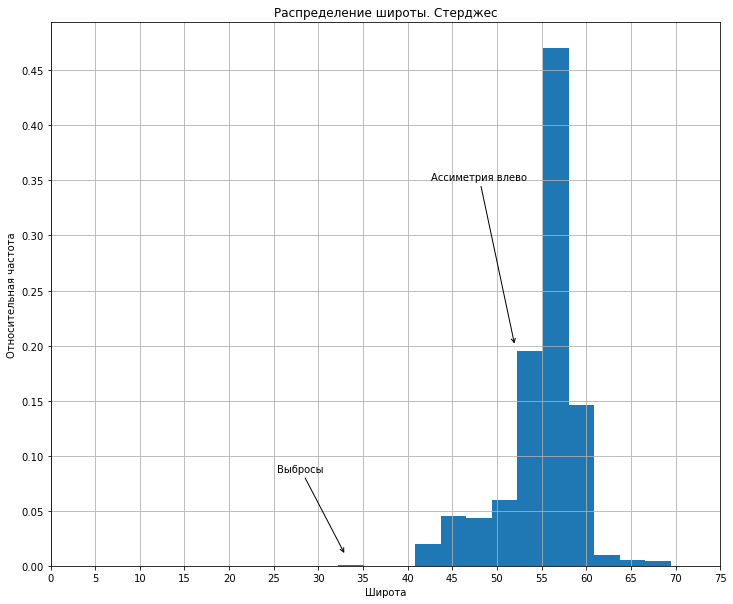

In [146]:
fig, ax = plt.subplots(figsize=(12, 10))
plt.hist(df.latitude, weights = np.ones_like(df.latitude) / len(df.latitude), bins = len(np.histogram_bin_edges(df.latitude, bins='sturges')) - 1) 
plt.ylabel('Относительная частота')
plt.xlabel('Широта')
ax.set_title('Распределение широты. Стерджес')

plt.annotate('Выбросы', xy=(33, 0.01), xytext=(28, 0.085),
             arrowprops={'arrowstyle':'->'}
             ,horizontalalignment='center')

plt.annotate('Ассиметрия влево', xy=(52, 0.2), xytext=(48, 0.35),
             arrowprops={'arrowstyle':'->'}
             ,horizontalalignment='center')

ax.xaxis.set_ticks(np.arange(0, 80, 5))
ax.yaxis.set_ticks(np.arange(0, 0.5, 0.05))

ax.grid()
plt.show()

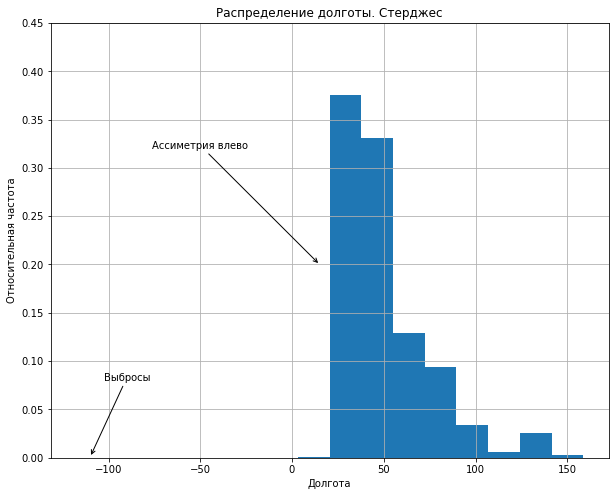

In [147]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.hist(df.longtitude, weights = np.ones_like(df.longtitude) / len(df.longtitude), 
         bins = len(np.histogram_bin_edges(df.longtitude, bins='sturges')) - 1) 
plt.ylabel('Относительная частота')
plt.xlabel('Долгота')
ax.set_title('Распределение долготы. Стерджес')

plt.annotate('Выбросы', xy=(-110, 0.001), xytext=(-90, 0.08),
             arrowprops={'arrowstyle':'->'}
             ,horizontalalignment='center')

plt.annotate('Ассиметрия влево', xy=(15, 0.20), xytext=(-50, 0.32),
             arrowprops={'arrowstyle':'->'}
             ,horizontalalignment='center')


ax.yaxis.set_ticks(np.arange(0, 0.5, 0.05))

ax.grid()
plt.show()

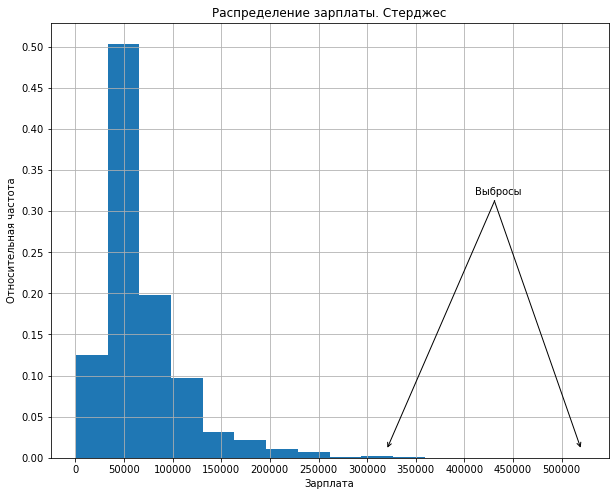

In [148]:
fig, ax = plt.subplots(figsize=(10, 8))

plt.hist(df.salary, weights = np.ones_like(df.salary) / len(df.salary), 
         bins = len(np.histogram_bin_edges(df.salary, bins='sturges')) - 1)

plt.ylabel('Относительная частота')
plt.xlabel('Зарплата')
ax.set_title('Распределение зарплаты. Стерджес')

plt.annotate('Выбросы', xy=(320000, 0.01), xytext=(435000, 0.32),
             arrowprops={'arrowstyle':'->'}
             ,horizontalalignment='center')

plt.annotate('', xy=(520000, 0.01), xytext=(430000, 0.315),
             arrowprops={'arrowstyle':'->'}
             ,horizontalalignment='center')

ax.xaxis.set_ticks(np.arange(0, 550000, 50000))
ax.yaxis.set_ticks(np.arange(0, 0.55, 0.05))

ax.grid()
plt.show()

## Анализ качественных признаков

In [149]:
df.isna().sum()

premium                        0
name                           0
response_letter_required       0
city                           0
latitude                       0
longtitude                     0
raw                            0
experience                     0
schedule                       0
skills                      3934
has_test                       0
employer                       0
currency                       0
salary                         0
dtype: int64

In [150]:
df.describe()

,latitude,longtitude,salary
count,20133.000000,20133.000000,20133.000000
mean,55.034746,50.674378,68385.510156
std,4.112057,23.114345,44471.156199
min,23.608705,-117.780920,739.500000
25%,54.198566,37.544997,40000.000000
50%,55.749506,39.809390,55000.000000
75%,56.837849,57.522901,80970.000000
max,69.496790,158.679625,522000.000000


## Города

В большом количестве(10 тысяч) вакансий город не указан. Такие значения мы заполним категорией "Неизвестно". Города, которые попадаются меньше трех раз мы объеденим в одну категорию "Другие", т.к. в таком случае эта категория получается не такой большой по сравнению с другими категориями. 

In [151]:
import pickle 
import matplotlib.path as mplPath

In [152]:
mapper = {
"Алтайский край":"Южно-Сибирский",
"Республика Алтай":"Южно-Сибирский",
"Курская область":"Центрально-Чернозёмный",
"Тульская область":"Центральный",
"Пермский край":"Волго-Камский",
"Тверская область":"Центральный",
"Липецкая область":"Центрально-Чернозёмный",
"Орловская область":"Центральный",
"Самарская область":"Волго-Уральский",
"Кировская область":"Волго-Камский",
"Брянская область":"Центральный",
"Московская область":"Центральный",
"Смоленская область":"Центральный",
"Рязанская область":"Центральный",
"Калужская область":"Центральный",
"Тамбовская область":"Центрально-Чернозёмный",
"Ростовская область":"Южный",
"Республика Марий Эл":"Волго-Камский",
"Курганская область":"Уральско-Сибирский",
"Мурманская область":"Северно-Западный",
"Республика агестан":"Северно-Кавказский",
"Республика Карелия":"Северно-Западный",
"Ивановская область":"Центральный",
"Кемеровская область":"Южно-Сибирский",
"Вологодская область":"Северно-Западный",
"Магаданская область":"Дальневосточный",
"Республика Татарстан":"Волго-Камский",
"Воронежская область":"Центрально-Чернозёмный",
"Белгородская область":"Центрально-Чернозёмный",
"Ярославская область":"Центральный",
"Ульяновская область":"Волго-Уральский",
"Владимирская область":"Центральный",
"Новосибирская область":"Южно-Сибирский",
"Ленинградская область":"Северно-Западный",
"Астраханская область":"Южный",
"Удмуртская Республика":"Волго-Камский",
"Архангельская область":"Северный",
"Чувашская Республика":"Волго-Камский",
"Республика Калмыкия":"Южный",
"Республика Башкортостан":"Волго-Уральский",
"Республика Саха (Якутия)":"Дальневосточный",
"Кабардино-Балкарская Республика":"Северно-Кавказский",
"Республика Северная Осетия-Алания":"Северно-Кавказский",
"Республика Тыва":"Ангаро-Енисейский",
"Карачаево-Черкесская Республика":"Северно-Кавказский",
"Еврейская автономная область":"Дальневосточный",
"Томская область":"Южно-Сибирский",
"Амурская область":"Дальневосточный",
"Пензенская область":"Волго-Уральский",
"Республика Бурятия":"Дальневосточный",
"Республика Хакасия":"Ангаро-Енисейский",
"Республика Мордовия":"Волго-Камский",
"Саратовская область":"Волго-Уральский",
"Костромская область":"Центральный",
"Республика Ингушетия":"Северно-Кавказский",
"Чеченская Республика":"Северно-Кавказский",
"Калининградская область":"Северно-Западный",
"Псковская область":"Северно-Западный",
"Республика Коми":"Северный",
"Оренбургская область":"Волго-Уральский",
"Новгородская область":"Северно-Западный",
"Челябинская область":"Уральско-Сибирский",
"Ставропольский край":"Северно-Кавказский",
"Свердловская область":"Уральско-Сибирский",
"Волгоградская область":"Южный",
"Республика Адыгея":"Южный",
"Ханты-Мансийский автономный округ":"Уральско-Сибирский",
"Тюменская область":"Уральско-Сибирский",
"Омская область":"Южно-Сибирский",
"Приморский край":"Дальневосточный",
"Хабаровский край":"Дальневосточный",
"Сахалинская область":"Дальневосточный",
"Чукотский автономный округ":"Дальневосточный",
"Красноярский край":"Ангаро-Енисейский",
"Иркутская область":"Ангаро-Енисейский",
"Забайкальский край":"Дальневосточный",
"Камчатский край":"Дальневосточный",
"Ненецкий автономный округ":"Северный",
"Ямало-Ненецкий автономный округ":"Уральско-Сибирский",
"Краснодарский край":"Южный",
"Нижегородская область":"Волго-Камский",
"Unknown" : "Unknown" }

In [153]:
def convert_to_region(lat, long):
    coord = np.array([lat, long])
    for reg, area in loaded_dict.items():
        if area.contains_point(coord):
            return reg
    
    return 'Unknown'

with open('../../data/saved_dictionary.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)
    
l = []
for v in loaded_dict.values():
    l.append(mplPath.Path(np.array(v['0'])))
    
loaded_dict = dict(zip(list(loaded_dict.keys()), l))
df.loc[:, 'Region'] = df.apply(lambda x: convert_to_region(x.latitude, x.longtitude), axis = 1)

df.loc[:, 'Region'] = df.loc[:, "Region"].map(mapper)

In [154]:
unknown = df[(df['Region']=='Unknown')]

In [155]:
unknown['city']

5                                      Владивосток
29                                     Симферополь
212                               регион Аль-Дарфа
225                                   Новороссийск
267                                    Архангельск
286                                       Таганрог
360                                    Владивосток
368                                    Севастополь
376                                    Севастополь
380                                      Ломоносов
474                                       Таганрог
487                                         Батуми
488                                    Архангельск
490                                    Владивосток
533                                    Севастополь
550                    Артёмовский городской округ
604                                    Архангельск
624                                  посёлок Волна
790                                    Симферополь
794                    Артёмовс

In [225]:
df.loc[df["city"].isin(["посёлок Русский","Владивосток","Артёмовский городской округ","посёлок городского типа Забайкальск","поселок городского типа Забайкальск","городской округ Владивостокский"]), "Region"] = "Дальневосточный"
df.loc[df["city"].isin(["посёлок городского типа Кореиз","село Скворцово","посёлок Розовый","село Дубки","Керчь","посёлок Волна","Анапа","Евпатория","Симферополь", "Ялта", "Севастополь", "Таганрог", "посёлок городского типа Сириус", "Новороссийск","Дербент","село Яблочное","посёлок городского типа Гвардейское","село Белоглинка","Избербаш","Махачкала","Республика Крым","посёлок городского типа Красногвардейское","Сочи","село Фонтаны",]), "Region"] = "Северо-Кавказский"
df.loc[df["city"].isin(["Архангельск","Полярный"]), "Region"] = "Северный"
df.loc[df["city"].isin(["Санкт-Петербург","Ломоносов","Сосновый Бор"]), "Region"] = "Северно-Западный"
df.loc[df["city"].isin(["посёлок Новый"]), "Region"] = "Уральский"

In [226]:
unknown = df[(df['Region']=='Unknown')]
unknown

,premium,name,response_letter_required,city,latitude,longtitude,raw,experience,schedule,skills,has_test,employer,currency,salary,Region
212,False,Blockchain System Analyst,False,регион Аль-Дарфа,23.608705,53.434111,регион Аль-Дарфа,От 1 года до 3 лет,Полный день,Blockchain_Teamplayer_GitHub_web3_Bash_etheriu...,False,IslamicCoin,USD,3480.0,Unknown
487,False,Producer,True,Батуми,41.638333,41.622594,"Батуми, улица Пармен Лориа, 8",От 3 до 6 лет,Полный день,Английский язык_Грамотная речь_Работа в команд...,False,Равенэйдж,RUR,143550.0,Unknown
1301,False,Системный инженер,False,Ташкент,41.239647,69.181173,"Ташкент, 1-й проезд Чорбог, 7",От 3 до 6 лет,Полный день,Active Directory_TCP/IP_Администрирование серв...,False,Tarleplast,USD,1522.5,Unknown
1337,False,Middle+/Senior Frontend-разработчик Vue (Черно...,False,Подгорица,42.435426,19.263895,Подгорица,От 3 до 6 лет,Полный день,TypeScript_Redux_JavaScript_Node.js_MobX,False,AMarkets,RUR,250000.0,Unknown
2339,False,Data Engineer (Senior) Cloud Data Warehouse - ...,False,София,42.640895,23.373032,"София, бульвар Александр Малинов",Более 6 лет,Полный день,Python_SQL_SCALA_Data Analysis_Azure_Snowflake...,False,NobleHire,EUR,4132.5,Unknown
2510,False,Дессинатор-программист STOLL,False,Гродно,53.663063,23.795905,"Гродно, улица Лизы Чайкиной, 4",От 3 до 6 лет,Полный день,Массовое производство_Готовность к командировк...,False,Текстильная Мануфактура,RUR,100000.0,Unknown
3619,False,"Старший С++ разработчик (Лимасcол, Кипр)",False,Лимассол,34.687526,33.042165,Лимассол,От 3 до 6 лет,Полный день,C++_MQL5_IPC_multiprocessing_TCP_asynchronious...,False,MetaQuotes Software Corp.,EUR,6250.0,Unknown
5622,False,Middle+/Senior Frontend-разработчик Vue (Черно...,False,Подгорица,42.435426,19.263895,Подгорица,От 3 до 6 лет,Полный день,TypeScript_Redux_JavaScript_Node.js_MobX,False,AMarkets,RUR,250000.0,Unknown
5862,False,Системный администратор / DevOps специалист в ...,True,Батуми,41.638333,41.622594,"Батуми, улица Пармен Лориа, 8",От 1 года до 3 лет,Полный день,Английский язык_Грамотная речь_Atlassian Jira_...,False,Равенэйдж,USD,1740.0,Unknown
6429,False,Project manager / Tech lead,False,Лимассол,34.686305,33.033773,Лимассол,От 3 до 6 лет,Полный день,Git_Agile Project Management_Английский язык_A...,False,Wisebits,EUR,3045.0,Unknown


In [ ]:
df.Region.value_counts()

In [ ]:
from matplotlib.legend_handler import HandlerBase
from matplotlib.text import Text

class TextHandler(HandlerBase):
    def create_artists(self, legend, tup ,xdescent, ydescent,
                        width, height, fontsize,trans):
        tx = Text(width/2.,height/2,tup[0], fontsize=fontsize,
                  ha="center", va="center", color=tup[1], fontweight="bold")
        return [tx]

le = preprocessing.LabelEncoder()
encoded = pd.Series(le.fit_transform(df.Region))

df1 = encoded.value_counts(normalize=True)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x='index', y='percent', kind='bar', data=df1, palette='muted')

g.ax.set_xlabel('Регион', fontsize = 15)
g.ax.set_ylabel('Относительная частота', fontsize = 15)

for rect in g.ax.patches:
    g.ax.text (rect.get_x() + rect.get_width()  / 2, rect.get_height() + 0.01, round(rect.get_height(), 3), horizontalalignment='center', fontsize = 11)

handltext = le.transform(le.classes_).astype(str)
labels = le.classes_

t = g.ax.get_xticklabels()
labeldic = dict(zip(handltext, labels))
labels = [labeldic[h.get_text()]  for h in t]
handles = [(h.get_text(),c.get_fc()) for h,c in zip(t,g.ax.patches)]

g.ax.legend(handles, labels, handler_map={tuple : TextHandler()})
g.fig.set_figwidth(10)
g.fig.set_figheight(8)

plt.show()

## Сопроводительное письмо 

Данная переменная очень сильно не сбалансирована и вакансии, для которых сопроводительное письмо обязательно для ~1% вакансий. 

In [ ]:
df.response_letter_required.value_counts()

In [ ]:
df.response_letter_required = df.response_letter_required.map({False: 0, True: 1}) 

In [ ]:
from matplotlib.legend_handler import HandlerBase
from matplotlib.text import Text
from matplotlib.pyplot import figure

class TextHandler(HandlerBase):
    def create_artists(self, legend, tup ,xdescent, ydescent,
                        width, height, fontsize,trans):
        tx = Text(width/2.,height/2,tup[0], fontsize=fontsize,
                  ha="center", va="center", color=tup[1], fontweight="bold")
        return [tx]


df1 = df.response_letter_required.value_counts(normalize=True)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x='index', y='percent',kind='bar', data=df1, palette='muted')

g.ax.set_xlabel('Необходимость сопроводительного письма', fontsize = 15)
g.ax.set_ylabel('Относительная частота', fontsize = 15)

for rect in g.ax.patches:
    g.ax.text (rect.get_x() + rect.get_width()  / 2, rect.get_height() + 0.01, round(rect.get_height(), 3), horizontalalignment='center', fontsize = 11)

handltext = ['0', '1']
labels = [ "False", "True"]

t = g.ax.get_xticklabels()
labeldic = dict(zip(handltext, labels))
labels = [labeldic[h.get_text()]  for h in t]
handles = [(h.get_text(),c.get_fc()) for h,c in zip(t,g.ax.patches)]

g.ax.legend(handles, labels, handler_map={tuple : TextHandler()}) 
g.fig.set_figwidth(10)
g.fig.set_figheight(8)

plt.show()

## Премиум

Переменная так же очень несбалансирована с ~0.1% вакансий являющихся эксклюзивными для премиум пользователей

In [ ]:
df.isna().sum()

In [ ]:
df.premium.value_counts()

In [ ]:
df.premium = df.premium.map({False: 0, True: 1})

In [ ]:
from matplotlib.legend_handler import HandlerBase
from matplotlib.text import Text

class TextHandler(HandlerBase):
    def create_artists(self, legend, tup ,xdescent, ydescent,
                        width, height, fontsize,trans):
        tx = Text(width/2.,height/2,tup[0], fontsize=fontsize,
                  ha="center", va="center", color=tup[1], fontweight="bold")
        return [tx]


df1 = df.premium.value_counts(normalize=True)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x='index', y='percent',kind='bar', data=df1, palette='muted')

g.ax.set_xlabel('Необходимость наличия премиум аккаунта', fontsize = 15)
g.ax.set_ylabel('Относительная частота', fontsize = 15)

for rect in g.ax.patches:
    g.ax.text (rect.get_x() + rect.get_width()  / 2, rect.get_height() + 0.01, round(rect.get_height(), 3), horizontalalignment='center', fontsize = 11)

handltext = ['0', '1']
labels = [ "False", "True"]

t = g.ax.get_xticklabels()
labeldic = dict(zip(handltext, labels))
labels = [labeldic[h.get_text()]  for h in t]
handles = [(h.get_text(),c.get_fc()) for h,c in zip(t,g.ax.patches)]

g.ax.legend(handles, labels, handler_map={tuple : TextHandler()})
g.fig.set_figwidth(10)
g.fig.set_figheight(8)

plt.show()

## График работы

График работы имеет сильный дисбаланс, так как подавляющее большинство технических вакансий требуют полный 8 часовой рабочий день, лишь малая часть предлагает удаленную работу 

In [ ]:
df.schedule.value_counts()

In [ ]:
from matplotlib.legend_handler import HandlerBase
from matplotlib.text import Text

class TextHandler(HandlerBase):
    def create_artists(self, legend, tup ,xdescent, ydescent,
                        width, height, fontsize,trans):
        tx = Text(width/2.,height/2,tup[0], fontsize=fontsize,
                  ha="center", va="center", color=tup[1], fontweight="bold")
        return [tx]


df1 = df.schedule.value_counts(normalize=True)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x='index', y='percent',kind='bar', data=df1, palette='muted')

g.ax.set_xlabel('График работы', fontsize = 15)
g.ax.set_ylabel('Относительная частота', fontsize = 15)

for rect in g.ax.patches:
    g.ax.text (rect.get_x() + rect.get_width()  / 2, rect.get_height() + 0.01, round(rect.get_height(), 3), horizontalalignment='center', fontsize = 11)

g.fig.set_figwidth(10)
g.fig.set_figheight(8)

plt.show()

## Работодатель

In [ ]:
df.employer.value_counts()

In [ ]:
rare_employer = df['employer'].value_counts()

In [ ]:
rare_employer[rare_employer < 2]

In [ ]:
df.loc[df.employer.isin(rare_employer[rare_employer < 2].index), 'employer'] = 'Другие'

In [ ]:
df.employer.value_counts()

## Тест

Лишь около 1% вакансий требуют прохождение тестового задания для отклика на вакансию, эта переменная очень не сбалансирована

In [ ]:
df.has_test.value_counts()

In [ ]:
df.has_test = df.has_test.map({False: 0, True: 1})

In [ ]:
from matplotlib.legend_handler import HandlerBase
from matplotlib.text import Text

class TextHandler(HandlerBase):
    def create_artists(self, legend, tup ,xdescent, ydescent,
                        width, height, fontsize,trans):
        tx = Text(width/2.,height/2,tup[0], fontsize=fontsize,
                  ha="center", va="center", color=tup[1], fontweight="bold")
        return [tx]


df1 = df.has_test.value_counts(normalize=True)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x='index', y='percent',kind='bar', data=df1, palette='muted')

g.ax.set_xlabel('Необходимость прохождения тестового задания', fontsize = 15)
g.ax.set_ylabel('Относительная частота', fontsize = 15)

for rect in g.ax.patches:
    g.ax.text (rect.get_x() + rect.get_width()  / 2, rect.get_height() + 0.01, round(rect.get_height(), 3), horizontalalignment='center', fontsize = 11)

handltext = ['0', '1']
labels = [ "False", "True"]

t = g.ax.get_xticklabels()
labeldic = dict(zip(handltext, labels))
labels = [labeldic[h.get_text()]  for h in t]
handles = [(h.get_text(),c.get_fc()) for h,c in zip(t,g.ax.patches)]

g.ax.legend(handles, labels, handler_map={tuple : TextHandler()})
g.fig.set_figwidth(10)
g.fig.set_figheight(8)

plt.show()

## Опыт работы

Требования к опыту работы несбалансированы

In [ ]:
df.experience.value_counts()

In [ ]:
experience_map = {'Нет опыта': 0, 'От 1 года до 3 лет' : 1, 'От 3 до 6 лет': 2, 'Более 6 лет': 3}

In [ ]:
df.experience = df.experience.map(experience_map)

In [ ]:
from matplotlib.legend_handler import HandlerBase
from matplotlib.text import Text

class TextHandler(HandlerBase):
    def create_artists(self, legend, tup ,xdescent, ydescent,
                        width, height, fontsize,trans):
        tx = Text(width/2.,height/2,tup[0], fontsize=fontsize,
                  ha="center", va="center", color=tup[1], fontweight="bold")
        return [tx]

le = preprocessing.LabelEncoder()
encoded = pd.Series(le.fit_transform(df.experience))
    
df1 = encoded.value_counts(normalize=True)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x='index', y='percent',kind='bar', data=df1, palette='muted')

g.ax.set_xlabel('Опыт работы', fontsize = 15)
g.ax.set_ylabel('Относительная частота', fontsize = 15)

for rect in g.ax.patches:
    g.ax.text (rect.get_x() + rect.get_width()  / 2, rect.get_height() + 0.01, round(rect.get_height(), 3), horizontalalignment='center', fontsize = 11)

handltext = le.transform(le.classes_).astype(str)
labels = le.classes_

t = g.ax.get_xticklabels()
labeldic = dict(zip(handltext, labels))
labels = [labeldic[h.get_text()]  for h in t]
handles = [(h.get_text(),c.get_fc()) for h,c in zip(t,g.ax.patches)]

g.ax.legend(handles, labels, handler_map={tuple : TextHandler()})
g.fig.set_figwidth(10)
g.fig.set_figheight(8)

plt.show()